In [ ]:
# import modulo os e installazione di rtree e altro per far funzionare l'sjoin
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

In [ ]:
import pandas as pd
!pip install geopandas
import geopandas
!pip install contextily
import contextily as ctx

# **a. una mappa dell'Italia con le province colorate in base al numero di centri vaccinali Covid**

In [5]:
regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Reg01012021_g")
regioni

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,1,2,Valle d'Aosta,3.109681e+05,3.258838e+09,"POLYGON ((390652.644 5091766.171, 390748.643 5..."
2,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
3,2,4,Trentino-Alto Adige,8.008937e+05,1.360755e+10,"POLYGON ((743267.749 5219765.793, 743387.812 5..."
4,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5..."
5,2,6,Friuli Venezia Giulia,6.700448e+05,7.933911e+09,"MULTIPOLYGON (((872344.457 5061894.048, 872344..."
6,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219..."
7,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335..."
8,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563..."
9,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910..."


In [3]:
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/ProvCM01012021_g/ProvCM01012021_g_WGS84.dbf")
province

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,250242.112077,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,490111.881318,6.898443e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,315563.261771,1.508947e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,1,103,0,103,Verbano-Cusio-Ossola,-,Verbano-Cusio-Ossola,VB,Provincia,299029.117691,2.262164e+09,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
103,1,3,108,0,108,Monza e della Brianza,-,Monza e della Brianza,MB,Provincia,126272.490811,4.055793e+08,"POLYGON ((519754.706 5065242.380, 520199.702 5..."
104,3,11,109,0,109,Fermo,-,Fermo,FM,Provincia,198635.321418,8.619365e+08,"POLYGON ((884760.019 4804406.440, 885511.011 4..."
105,4,16,110,0,110,Barletta-Andria-Trani,-,Barletta-Andria-Trani,BT,Provincia,237762.889058,1.542032e+09,"POLYGON ((1081237.144 4611047.023, 1081399.393..."


In [6]:
# unito province e regioni per poi unirlo al df dei vaccini
prov_reg = pd.merge(province, regioni, how="outer", on="COD_REG")
prov_reg

,COD_RIP_x,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng_x,Shape_Area_x,geometry_x,COD_RIP_y,DEN_REG,Shape_Leng_y,Shape_Area_y,geometry_y
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5...",1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,250242.112077,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5...",1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,490111.881318,6.898443e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928...",1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,315563.261771,1.508947e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4...",1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,5,20,90,0,90,Sassari,-,Sassari,SS,Provincia,905825.725858,7.693245e+09,"MULTIPOLYGON (((443843.913 4483390.792, 443817...",5,Sardegna,1.438638e+06,2.409463e+10,"MULTIPOLYGON (((448813.650 4301762.751, 448823..."
103,5,20,91,0,91,Nuoro,-,Nuoro,NU,Provincia,555178.684320,5.639160e+09,"MULTIPOLYGON (((560275.001 4425014.251, 560096...",5,Sardegna,1.438638e+06,2.409463e+10,"MULTIPOLYGON (((448813.650 4301762.751, 448823..."
104,5,20,92,292,292,-,Cagliari,Cagliari,CA,Citta metropolitana,233359.265010,1.246632e+09,"MULTIPOLYGON (((502067.461 4315091.145, 502029...",5,Sardegna,1.438638e+06,2.409463e+10,"MULTIPOLYGON (((448813.650 4301762.751, 448823..."
105,5,20,95,0,95,Oristano,-,Oristano,OR,Provincia,380735.929103,2.989333e+09,"MULTIPOLYGON (((438105.344 4414838.331, 438069...",5,Sardegna,1.438638e+06,2.409463e+10,"MULTIPOLYGON (((448813.650 4301762.751, 448823..."


In [7]:
df_vaccini = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv")
df_vaccini

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
6715,VEN,Pfizer Pediatrico,54000,2022-02-09,ITH,ITH3,5,Veneto
6716,VEN,Pfizer/BioNTech,174331,2022-02-09,ITH,ITH3,5,Veneto
6717,VEN,Pfizer/BioNTech,5,2022-02-11,ITH,ITH3,5,Veneto
6718,VEN,Pfizer/BioNTech,1,2022-02-14,ITH,ITH3,5,Veneto


In [8]:
#   ho unito i 2 df per poter poi contare i num di centri vaccinali di covid
prov_reg_df_vaccini = pd.merge(prov_reg, df_vaccini, how="outer", left_on="DEN_REG", right_on="nome_area")
prov_reg_df_vaccini

,COD_RIP_x,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng_x,Shape_Area_x,geometry_x,COD_RIP_y,DEN_REG,Shape_Leng_y,Shape_Area_y,geometry_y,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,1.0,1.0,1.0,201.0,201.0,-,Torino,Torino,TO,Citta metropolitana,539249.81127,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",1.0,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",PIE,Pfizer/BioNTech,910.0,2020-12-27,ITC,ITC1,1.0,Piemonte
1,1.0,1.0,1.0,201.0,201.0,-,Torino,Torino,TO,Citta metropolitana,539249.81127,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",1.0,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",PIE,Pfizer/BioNTech,39000.0,2020-12-30,ITC,ITC1,1.0,Piemonte
2,1.0,1.0,1.0,201.0,201.0,-,Torino,Torino,TO,Citta metropolitana,539249.81127,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",1.0,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",PIE,Pfizer/BioNTech,975.0,2020-12-31,ITC,ITC1,1.0,Piemonte
3,1.0,1.0,1.0,201.0,201.0,-,Torino,Torino,TO,Citta metropolitana,539249.81127,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",1.0,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",PIE,Pfizer/BioNTech,20475.0,2021-01-05,ITC,ITC1,1.0,Piemonte
4,1.0,1.0,1.0,201.0,201.0,-,Torino,Torino,TO,Citta metropolitana,539249.81127,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",1.0,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",PIE,Pfizer/BioNTech,21450.0,2021-01-07,ITC,ITC1,1.0,Piemonte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,VDA,Moderna,2000.0,2022-01-27,ITC,ITC2,2.0,Valle d'Aosta / Vallée d'Aoste
35430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,VDA,Pfizer/BioNTech,3510.0,2022-02-02,ITC,ITC2,2.0,Valle d'Aosta / Vallée d'Aoste
35431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,VDA,Moderna,2000.0,2022-02-03,ITC,ITC2,2.0,Valle d'Aosta / Vallée d'Aoste
35432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,VDA,Pfizer Pediatrico,6000.0,2022-02-09,ITC,ITC2,2.0,Valle d'Aosta / Vallée d'Aoste


In [20]:
#  fatto un groupby per contare i centri vaccinale contando l'area
numero_centroVaccinali_prov = prov_reg_df_vaccini.groupby("DEN_UTS", as_index = False)["area"].count()
numero_centroVaccinali_prov

,DEN_UTS,area
0,Agrigento,293
1,Alessandria,293
2,Ancona,148
3,Aosta,0
4,Arezzo,320
...,...,...
102,Vercelli,293
103,Verona,269
104,Vibo Valentia,217
105,Vicenza,269


In [13]:
prov_reg

,COD_RIP_x,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng_x,Shape_Area_x,geometry_x,COD_RIP_y,DEN_REG,Shape_Leng_y,Shape_Area_y,geometry_y
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5...",1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,250242.112077,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5...",1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,490111.881318,6.898443e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928...",1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,315563.261771,1.508947e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4...",1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,5,20,90,0,90,Sassari,-,Sassari,SS,Provincia,905825.725858,7.693245e+09,"MULTIPOLYGON (((443843.913 4483390.792, 443817...",5,Sardegna,1.438638e+06,2.409463e+10,"MULTIPOLYGON (((448813.650 4301762.751, 448823..."
103,5,20,91,0,91,Nuoro,-,Nuoro,NU,Provincia,555178.684320,5.639160e+09,"MULTIPOLYGON (((560275.001 4425014.251, 560096...",5,Sardegna,1.438638e+06,2.409463e+10,"MULTIPOLYGON (((448813.650 4301762.751, 448823..."
104,5,20,92,292,292,-,Cagliari,Cagliari,CA,Citta metropolitana,233359.265010,1.246632e+09,"MULTIPOLYGON (((502067.461 4315091.145, 502029...",5,Sardegna,1.438638e+06,2.409463e+10,"MULTIPOLYGON (((448813.650 4301762.751, 448823..."
105,5,20,95,0,95,Oristano,-,Oristano,OR,Provincia,380735.929103,2.989333e+09,"MULTIPOLYGON (((438105.344 4414838.331, 438069...",5,Sardegna,1.438638e+06,2.409463e+10,"MULTIPOLYGON (((448813.650 4301762.751, 448823..."


In [17]:
#  ho unito il groupby con il df dei regioni per avere la loro geometria
numero_centroVaccinali_regione_prov = pd.merge(numero_centroVaccinali_prov, province, how="inner", on="DEN_UTS")
numero_centroVaccinali_regione_prov

,DEN_UTS,area,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
0,Agrigento,293,5,19,84,0,84,Agrigento,-,AG,Libero consorzio di comuni,461223.891527,3.054102e+09,"MULTIPOLYGON (((822886.611 3935355.889, 822871..."
1,Alessandria,293,1,1,6,0,6,Alessandria,-,AL,Provincia,474884.593778,3.560310e+09,"POLYGON ((453307.918 5005504.323, 454248.380 5..."
2,Ancona,148,3,11,42,0,42,Ancona,-,AN,Provincia,272834.656008,1.961932e+09,"POLYGON ((839227.174 4849956.872, 839931.918 4..."
3,Aosta,0,1,2,7,0,7,Aosta,-,AO,Provincia,310968.058205,3.258838e+09,"POLYGON ((390652.644 5091766.171, 390748.643 5..."
4,Arezzo,320,3,9,51,0,51,Arezzo,-,AR,Provincia,377947.087958,3.233269e+09,"MULTIPOLYGON (((759716.788 4832917.570, 759731..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Vercelli,293,1,1,2,0,2,Vercelli,-,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5..."
103,Verona,269,2,5,23,0,23,Verona,-,VR,Provincia,338171.850863,3.096209e+09,"POLYGON ((646461.323 5070531.489, 646402.575 5..."
104,Vibo Valentia,217,4,18,102,0,102,Vibo Valentia,-,VV,Provincia,202524.198570,1.148196e+09,"POLYGON ((1133745.148 4322320.462, 1134354.272..."
105,Vicenza,269,2,5,24,0,24,Vicenza,-,VI,Provincia,320749.419611,2.720819e+09,"POLYGON ((696544.410 5098659.850, 696984.295 5..."


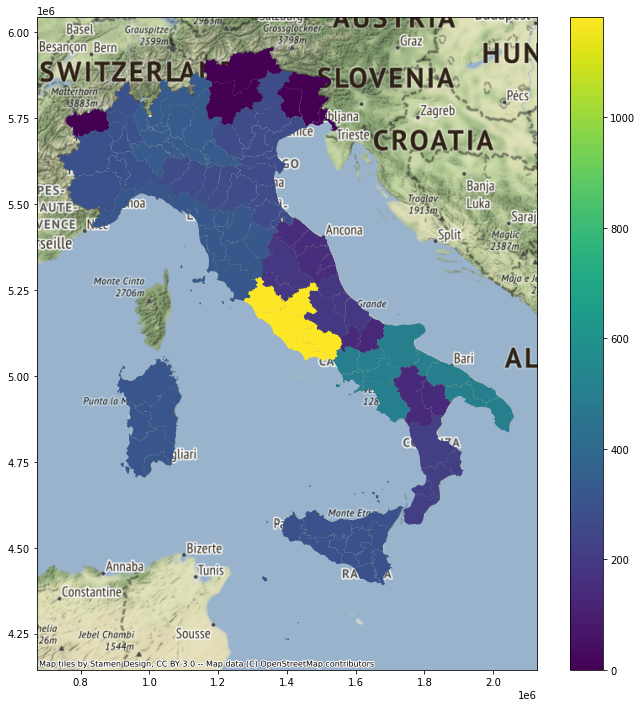

In [18]:
#  poi ho fatto il grafico
ax = numero_centroVaccinali_regione_prov.to_crs(epsg=3857).plot(figsize=(12,12), column = "area", legend = True)
ctx.add_basemap(ax)

# **b. una mappa dell'Italia con le regioni colorate in base alla percentuale di guariti dal Covid rispetto la popolazione**


In [ ]:
regioni

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,1,2,Valle d'Aosta,3.109681e+05,3.258838e+09,"POLYGON ((390652.644 5091766.171, 390748.643 5..."
2,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
3,2,4,Trentino-Alto Adige,8.008937e+05,1.360755e+10,"POLYGON ((743267.749 5219765.793, 743387.812 5..."
4,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5..."
5,2,6,Friuli Venezia Giulia,6.700448e+05,7.933911e+09,"MULTIPOLYGON (((872344.457 5061894.048, 872344..."
6,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219..."
7,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335..."
8,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563..."
9,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910..."


In [ ]:
info_guariti = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/soggetti-guariti.csv")
info_guariti

,area,nome_area,fascia_anagrafica,totale_guariti
0,ABR,Abruzzo,05-11,11532
1,ABR,Abruzzo,12-19,4279
2,ABR,Abruzzo,20-29,2473
3,ABR,Abruzzo,30-39,3469
4,ABR,Abruzzo,40-49,4367
...,...,...,...,...
184,VEN,Veneto,40-49,38700
185,VEN,Veneto,50-59,38094
186,VEN,Veneto,60-69,14472
187,VEN,Veneto,70-79,4939


In [ ]:
groupby_tot_guariti_per_regione = info_guariti.groupby("nome_area", as_index = False)["totale_guariti"].sum()
groupby_tot_guariti_per_regione

,nome_area,totale_guariti
0,Abruzzo,32274
1,Basilicata,9446
2,Calabria,37021
3,Campania,180294
4,Emilia-Romagna,189744
5,Friuli-Venezia Giulia,64525
6,Lazio,172892
7,Liguria,57952
8,Lombardia,306057
9,Marche,64393


In [ ]:
tot = groupby_tot_guariti_per_regione['totale_guariti'].sum()
groupby_tot_guariti_per_regione["totale_guariti_percentuale"] = (groupby_tot_guariti_per_regione["totale_guariti"] * 100)/tot
groupby_tot_guariti_per_regione

,nome_area,totale_guariti,totale_guariti_percentuale
0,Abruzzo,32274,1.623156
1,Basilicata,9446,0.475068
2,Calabria,37021,1.861896
3,Campania,180294,9.067523
4,Emilia-Romagna,189744,9.542792
5,Friuli-Venezia Giulia,64525,3.245155
6,Lazio,172892,8.695254
7,Liguria,57952,2.914579
8,Lombardia,306057,15.392519
9,Marche,64393,3.238516


In [ ]:
groupby_tot_guariti_per_regione_regioni = pd.merge(groupby_tot_guariti_per_regione, regioni, how="inner", left_on="nome_area", right_on="DEN_REG")
groupby_tot_guariti_per_regione_regioni

,nome_area,totale_guariti,totale_guariti_percentuale,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
0,Abruzzo,32274,1.623156,4,13,Abruzzo,6.153465e+05,1.082885e+10,"MULTIPOLYGON (((930273.425 4714737.743, 930147..."
1,Basilicata,9446,0.475068,4,17,Basilicata,6.142055e+05,1.007274e+10,"MULTIPOLYGON (((1073707.061 4445700.106, 10737..."
2,Calabria,37021,1.861896,4,18,Calabria,8.378109e+05,1.521607e+10,"MULTIPOLYGON (((1083358.846 4416348.741, 10833..."
3,Campania,180294,9.067523,4,15,Campania,8.881667e+05,1.366325e+10,"MULTIPOLYGON (((1037313.692 4449410.367, 10373..."
4,Emilia-Romagna,189744,9.542792,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335..."
5,Lazio,172892,8.695254,3,12,Lazio,1.054578e+06,1.722679e+10,"MULTIPOLYGON (((875952.995 4524692.050, 875769..."
6,Liguria,57952,2.914579,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219..."
7,Lombardia,306057,15.392519,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
8,Marche,64393,3.238516,3,11,Marche,6.261785e+05,9.400594e+09,"POLYGON ((802303.985 4874996.456, 802366.734 4..."
9,Molise,3850,0.193628,4,14,Molise,4.338181e+05,4.461183e+09,"POLYGON ((984002.800 4670714.415, 985067.040 4..."


In [ ]:
ax = groupby_tot_guariti_per_regione_regioni.to_crs(epsg=3857).plot(figsize=(12,12), column = "totale_guariti_percentuale", legend = True)
ctx.add_basemap(ax)

#############              ????????????????????????

AttributeError: ignored

# **c. una mappa dell'Italia con le regioni colorate in rosso se la percentuale di vaccinati (prima vaccinazione) è inferiore alla media e in verde se l apercentuale di vaccinati è superiore alla media**
